In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('synthetic.csv')
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
data.head()

,X,Y
0,37.454012,126.746701
1,95.071431,293.927975
2,73.199394,225.441700
3,59.865848,183.586508
4,15.601864,39.020372


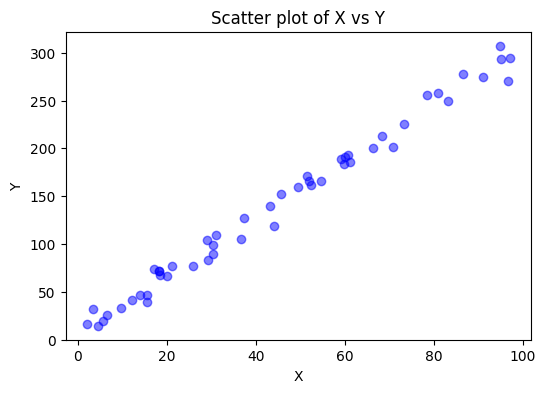

In [3]:
figure, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data['X'], data['Y'], color='blue', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot of X vs Y')
plt.show()

OLS Method

In [4]:
# fit a linear model
model = ols('Y~X',data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4229.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           1.84e-48
Time:                        11:05:43   Log-Likelihood:                -181.21
No. Observations:                  50   AIC:                             366.4
Df Residuals:                      48   BIC:                             370.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9669      2.426      3.284      0.0

LinearRegression from sklearn

In [5]:
X = data[['X']]
y = data['Y']
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"Intercept: {lin_reg.intercept_}, \nCoefficient: {lin_reg.coef_[0]}")
r2 = lin_reg.score(X, y)
print(f"R^2: {r2}")

Intercept: 7.966892744688863, 
Coefficient: 2.9776566003853104
R^2: 0.988776823805174


Do linear regression from scrach

In [6]:
# Manual linear regression (least squares) calculation
x = data['X'].values   # Convert to numpy array
y = data['Y'].values

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate coefficients
n_cov = np.sum((x - x_mean) * (y - y_mean))
n_var = np.sum((x - x_mean) ** 2)
slope = n_cov / n_var   # it is the slope of the regression line
intercept = y_mean - slope * x_mean  # it is the intercept of the regression line

print(f"Manual calculation:\nIntercept: {intercept}\nSlope: {slope}")

# Calculate R^2
y_pred = intercept + slope * x
ss_total = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2_manual = 1 - (ss_res / ss_total)
print(f"R^2: {r2_manual}")

Manual calculation:
Intercept: 7.966892744688863
Slope: 2.9776566003853104
R^2: 0.988776823805174


Batch Gradient Descent for Linear Regression

Converged after 45260 epochs
Intercept: 7.956044623358064, Slope: 2.9778289944531906


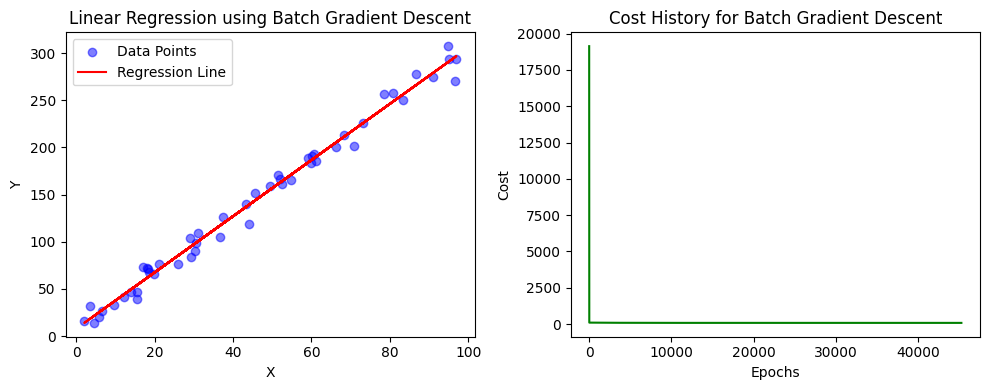

In [16]:
m = len(x)
theta_0 = 0  # intercept
theta_1 = 0.5  # slope

cost_history_bgd = []
alpha = 1e-3  # learning rate
threshold = 1e-8  # convergence threshold
epoch = 0
max_epochs = int(5e5)

# Batch gradient descent for linear regression
while True:
    y_pred = theta_0 + theta_1 * x
    d_theta_0 = (1/(m*2)) * np.sum(y_pred - y)
    d_theta_1 = (1/(m*2)) * np.sum((y_pred - y) * x)

    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1

    # Calculate cost for convergence check
    cost = np.mean((y_pred - y) ** 2)
    cost_history_bgd.append(cost)
    epoch += 1

    # Check for convergence
    if epoch >= max_epochs:
        print(f"Stopped after reaching maximum epochs: {max_epochs}")
        break

    if epoch > 2 and abs(cost_history_bgd[-1] - cost_history_bgd[-2]) < threshold:
        print(f"Converged after {epoch} epochs")
        break

print("============================================")
print(f"Intercept: {theta_0}, Slope: {theta_1}")

# Plotting the regression line
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x, y, color='blue', alpha=0.5, label='Data Points')
ax[0].plot(x, theta_0 + theta_1 * x, color='red', label='Regression Line')
ax[0].set_xlabel('X')  
ax[0].set_ylabel('Y')  
ax[0].set_title('Linear Regression using Batch Gradient Descent')  
ax[0].legend()  

ax[1].plot(cost_history_bgd, color='green', label='Cost History')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost History for Batch Gradient Descent')

plt.tight_layout()
plt.show()




Stochastic Gradient descent for linear regression

Stopped after reaching max epochs: 500000
Intercept: 7.972811512127167, Slope: 2.9708615501817968


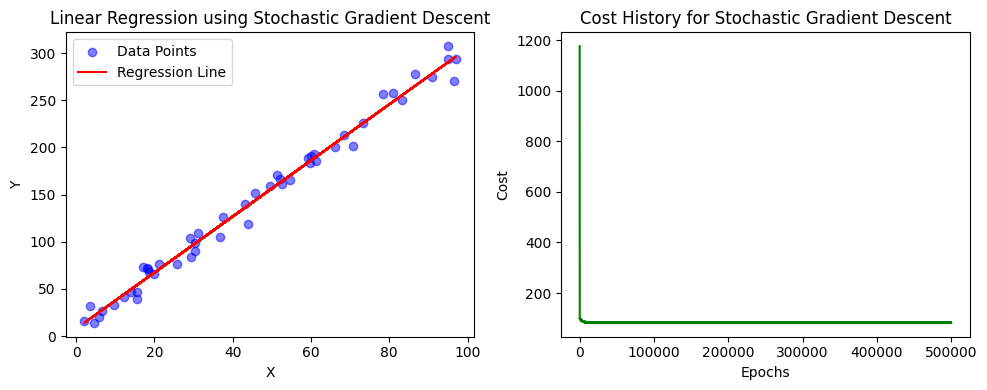

In [25]:
m = len(x)
theta_0 = 0  # intercept
theta_1 = 0.5  # initial slope guess

cost_history_sgd = []
alpha = 1e-5           # learning rate
threshold = 1e-7       # convergence threshold
epoch = 0
max_epochs = int(5e5)

while True:
    # Shuffle data indices for each epoch (key step for SGD!)
    indices = np.random.permutation(m)

    for i in indices:
        xi = x[i]
        yi = y[i]
        y_pred_i = theta_0 + theta_1 * xi

        # Gradients based on a single sample
        d_theta_0 = y_pred_i - yi
        d_theta_1 = (y_pred_i - yi) * xi

        # Update parameters
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

    # Cost calculated once per epoch (not per sample)
    y_pred_all = theta_0 + theta_1 * x
    cost = np.mean((y_pred_all - y) ** 2)
    cost_history_sgd.append(cost)

    epoch += 1

    # Stopping criteria
    if epoch >= max_epochs:
        print(f"Stopped after reaching max epochs: {max_epochs}")
        break

    if epoch > 2 and abs(cost_history_sgd[-1] - cost_history_sgd[-2]) < threshold:
        print(f"Converged after {epoch} epochs")
        break

# Output results
print("============================================")
print(f"Intercept: {theta_0}, Slope: {theta_1}")

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x, y, color='blue', alpha=0.5, label='Data Points')
ax[0].plot(x, theta_0 + theta_1 * x, color='red', label='Regression Line')
ax[0].set_xlabel('X')  
ax[0].set_ylabel('Y')
ax[0].set_title('Linear Regression using Stochastic Gradient Descent')  
ax[0].legend()  

ax[1].plot(cost_history_sgd, color='green', label='Cost History')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost History for Stochastic Gradient Descent')

plt.tight_layout()
plt.show()



Mini Batch Gradient Descent for linear regression 

Converged after 159167 epochs
Intercept: 7.890157566009862, Slope: 2.9788760455960133


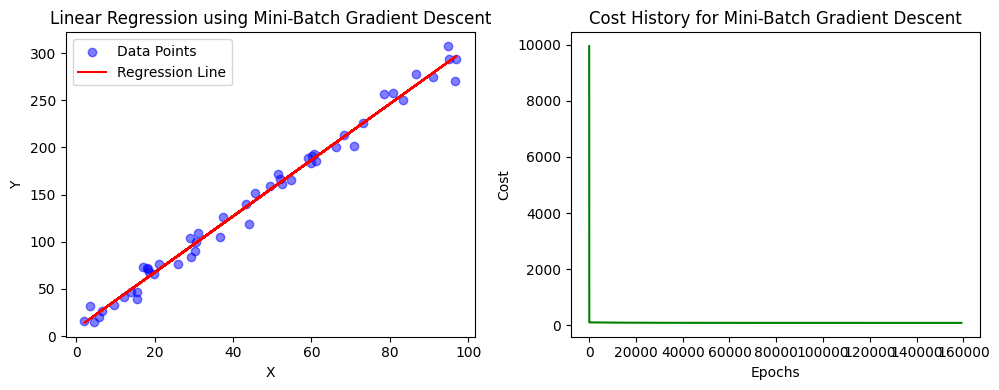

In [24]:
# Hyperparameters
m = len(x)
theta_0 = 0  # intercept
theta_1 = 0.5  # slope

alpha = 1e-4  # learning rate 
batch_size = 100  # mini-batch size
threshold = 1e-7
max_epochs = int(5e5)

cost_history_mgd = []
epoch = 0

# Shuffle indices initially
indices = np.arange(m)
while True:
    np.random.shuffle(indices)  # shuffle for each epoch

    # Iterate through mini-batches
    for i in range(0, m, batch_size):
        batch_idx = indices[i:i + batch_size]
        xb = x[batch_idx]
        yb = y[batch_idx]

        # Predictions
        y_pred_b = theta_0 + theta_1 * xb

        # Gradients for batch
        d_theta_0 = np.mean(y_pred_b - yb)
        d_theta_1 = np.mean((y_pred_b - yb) * xb)

        # Parameter update
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

    # Cost after the epoch (on full data)
    y_pred_all = theta_0 + theta_1 * x
    cost = np.mean((y_pred_all - y) ** 2)
    cost_history_mgd.append(cost)
    epoch += 1

    if epoch >= max_epochs:
        print(f"Stopped after reaching maximum epochs: {max_epochs}")
        break

    if epoch > 2 and abs(cost_history_mgd[-1] - cost_history_mgd[-2]) < threshold:
        print(f"Converged after {epoch} epochs")
        break

# Output results
print("============================================")
print(f"Intercept: {theta_0}, Slope: {theta_1}")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x, y, color='blue', alpha=0.5, label='Data Points')
ax[0].plot(x, theta_0 + theta_1 * x, color='red', label='Regression Line')
ax[0].set_xlabel('X')  
ax[0].set_ylabel('Y')  
ax[0].set_title('Linear Regression using Mini-Batch Gradient Descent')  
ax[0].legend()  

ax[1].plot(cost_history_mgd, color='green', label='Cost History')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost History for Mini-Batch Gradient Descent')

plt.tight_layout()
plt.show()